In [7]:
import numpy as np
from Data_Visualization import Data_Visualization
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from Data_Process import Data_Process
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# perform decision logistic regression with parameters tuning on data set
if __name__=="__main__":

    time_results={}    # for calculate the time efficiency

    X, Y=Data_Process().get_data()
    X_train, X_test, y_train, y_test =Data_Process().data_split(X, Y)

    LR = LogisticRegression(random_state=0)
    # Exhaustive search over specified parameter values for an estimator, including:
    #  1. The penalty term (L1--power 1 or L2--power 2)
    #  2. 'C' means inverse of regularization strength. Like in support vector machines, 
    #      smaller values specify stronger regularization.
    #  3. 'fit_intercept' specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    parameters={'penalty':['l1', 'l2'], 'C':[0.1, 1, 10], 'fit_intercept':[True, False]}
    scorer=make_scorer(accuracy_score)    # make accuracy as the evaluation metrics in parameeter tuning

    # data training (including parameter tuning)
    start1 = time()
    LR_obj=GridSearchCV(estimator=LR, param_grid=parameters, scoring=scorer)
    LR_fit=LR_obj.fit(X_train, y_train)
    LR_best=LR_fit.best_estimator_
    end1 = time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2 = time()
    y_train_pred = LR_best.predict(X_train)
    y_test_pred = LR_best.predict(X_test)
    end2 = time()
    time_results['prediction time'] = end2 - start2

    # calculating the metrics
    train_accuracy = 1.0 * np.mean(y_train_pred == y_train)
    test_accuracy = 1.0 * np.mean(y_test_pred == y_test)
    train_fscore = f1_score(y_train, y_train_pred)
    test_fscore = f1_score(y_test, y_test_pred)

    print 'the accuracy of the training set modeled by logistic regression after tuning is: ', train_accuracy
    print 'the accuracy of the test set modeled by logistic regression after tuning is ', test_accuracy
    print 'the F-score of the training set modeled by logistic regression after tuning is: ', train_fscore
    print 'the F-score of the test set modeled by logistic regression after tuning is ', test_fscore

    print time_results
    print confusion_matrix(y_train, y_train_pred)
    print confusion_matrix(y_test, y_test_pred)

the accuracy of the training set modeled by logistic regression after tuning is:  0.974178403756
the accuracy of the test set modeled by logistic regression after tuning is  0.972027972028
the F-score of the training set modeled by logistic regression after tuning is:  0.979439252336
the F-score of the test set modeled by logistic regression after tuning is  0.977272727273
{'training time': 4.7829999923706055, 'prediction time': 0.0}
[[153   6]
 [  5 262]]
[[53  0]
 [ 4 86]]


In [9]:
from sklearn.svm import SVC

# perform support vector classification with parameters tuning on data set
if __name__=="__main__":

    time_results = {}  # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    X=Data_Process().data_normalization(X)
    X_train, X_test, y_train, y_test=Data_Process().data_split(X, Y)

    svc = SVC(random_state=0)
    # Exhaustive search over specified parameter values for an estimator, including:
    #  1.'C': Penalty parameter of the error term. smaller values specify stronger regularization.
    #  2.'kernel': Specifies the kernel type to be used in the algorithm, including polynomial, gaussian and sigmoid
    #  3.'gamma': defines how far the influence of a single training example reaches, 
    #     a small gamma value define a Gaussian function with a large variance
    parameters = {'C': [1, 10, 20, 50], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
    scorer = make_scorer(accuracy_score)   # make accuracy as the evaluation metrics in parameeter tuning

    # data training (including parameter tuning)
    start1 = time()
    svc_obj=GridSearchCV(estimator=svc, param_grid=parameters, scoring=scorer)
    svc_fit=svc_obj.fit(X_train, y_train)
    svc_best = svc_fit.best_estimator_
    end1 = time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2 = time()
    y_train_pred = svc_best.predict(X_train)
    y_test_pred = svc_best.predict(X_test)
    end2 = time()
    time_results['prediction time'] = end2 - start2

    # compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_fscore = f1_score(y_train, y_train_pred)
    test_fscore = f1_score(y_test, y_test_pred)

    print 'the accuracy of the training set modeled by SVC after tuning is: ', train_accuracy
    print 'the accuracy of the test set modeled by SVC after tuning is ', test_accuracy
    print 'the F-score of the training set modeled by SVC after tuning is: ', train_fscore
    print 'the F-score of the test set modeled by SVC after tuning is ', test_fscore

    print time_results
    print confusion_matrix(y_train, y_train_pred)
    print confusion_matrix(y_test, y_test_pred)

the accuracy of the training set modeled by SVC after tuning is:  0.988262910798
the accuracy of the test set modeled by SVC after tuning is  0.972027972028
the F-score of the training set modeled by SVC after tuning is:  0.990689013035
the F-score of the test set modeled by SVC after tuning is  0.978021978022
{'training time': 2.203000068664551, 'prediction time': 0.0}
[[155   4]
 [  1 266]]
[[50  3]
 [ 1 89]]


the accuracy of the training set modeled by Decision Tree after tuning is:  0.992957746479
the accuracy of the test set modeled by Decision Tree after tuning is  0.895104895105
the F-score of the training set modeled by Decision Tree after tuning is:  0.994413407821
the F-score of the test set modeled by Decision Tree after tuning is  0.913294797688
{'training time': 0.5509998798370361, 'prediction time': 0.016000032424926758}
[[156   3]
 [  0 267]]
[[49  4]
 [11 79]]


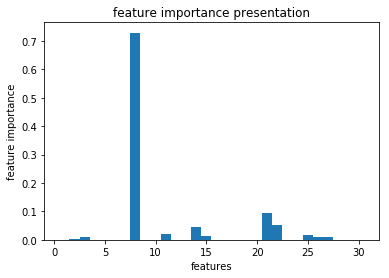

In [10]:
from sklearn.tree import DecisionTreeClassifier

# perform decision tree classification with parameters tuning on data set
if __name__=="__main__":

    time_results = {}    # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    X_train, X_test, y_train, y_test=Data_Process().data_split(X, Y)

    DTC = DecisionTreeClassifier(random_state=0)
    # Exhaustive search over specified parameter values for an estimator, including:
    #  1. The criterion used (calculating gini or entropy)
    #  2. The selection of max number of features will be used 
    #  3. The selection of max depth the tree will reach
    parameters = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2', None], 'max_depth': [3, 5, None]}
    scorer = make_scorer(accuracy_score)    # make accuracy as the evaluation metrics in parameeter tuning

    # data training (including parameter tuning)
    start1 = time()
    DTC_obj=GridSearchCV(estimator=DTC, param_grid=parameters, scoring=scorer)
    DTC_fit=DTC_obj.fit(X_train, y_train)
    DTC_best = DTC_fit.best_estimator_
    end1 = time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2 = time()
    y_train_pred = DTC_best.predict(X_train)
    y_test_pred = DTC_best.predict(X_test)
    end2 = time()
    time_results['prediction time'] = end2 - start2

    # calculating the metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_fscore=f1_score(y_train, y_train_pred)
    test_fscore=f1_score(y_test, y_test_pred)

    print 'the accuracy of the training set modeled by Decision Tree after tuning is: ', train_accuracy
    print 'the accuracy of the test set modeled by Decision Tree after tuning is ', test_accuracy
    print 'the F-score of the training set modeled by Decision Tree after tuning is: ', train_fscore
    print 'the F-score of the test set modeled by Decision Tree after tuning is ', test_fscore

    print time_results
    print confusion_matrix(y_train, y_train_pred)
    print confusion_matrix(y_test, y_test_pred)
    
    # visualiza the important features in decision tree
    Data_Visualization().feature_importance_vis(DTC_best)

the accuracy of the training set modeled by Random Forest after tuning is:  0.995305164319
the accuracy of the test set modeled by Random Forest after tuning is  0.979020979021
the F-score of the training set modeled by Random Forest after tuning is:  0.996268656716
the F-score of the test set modeled by Random Forest after tuning is  0.983240223464
{'training time': 74.67599987983704, 'prediction time': 0.23399996757507324}
[[157   2]
 [  0 267]]
[[52  1]
 [ 2 88]]


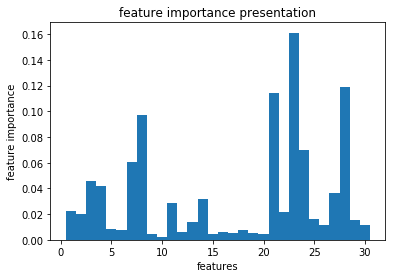

In [11]:
from sklearn.ensemble import RandomForestClassifier

# perform random forest classification with parameters tuning on data set
if __name__=="__main__":

    time_results = {} # for calculate the time efficiency

    X, Y = Data_Process().get_data()
    X_train, X_test, y_train, y_test=Data_Process().data_split(X, Y)

    RFC = RandomForestClassifier(random_state=0)
    # Exhaustive search over specified parameter values for an estimator, including:
    #  1.'n_estimators': The number of trees in the forest. 
    #  2.The criterion used for calculation('gini' or 'entropy') 
    #  3.The max depth the trees will reach
    parameters = {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, None]}
    scorer = make_scorer(accuracy_score)   # make accuracy as the evaluation metrics in parameeter tuning

    # data training (including parameter tuning)
    start1 = time()
    RFC_obj=GridSearchCV(estimator=RFC, param_grid=parameters, scoring=scorer)
    RFC_fit=RFC_obj.fit(X_train, y_train)
    RFC_best = RFC_fit.best_estimator_
    end1 = time()
    time_results['training time'] = end1 - start1

    # make prediction
    start2 = time()
    y_train_pred = RFC_best.predict(X_train)
    y_test_pred = RFC_best.predict(X_test)
    end2 = time()
    time_results['prediction time'] = end2 - start2

    # calculate the metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_fscore = f1_score(y_train, y_train_pred)
    test_fscore = f1_score(y_test, y_test_pred)

    print 'the accuracy of the training set modeled by Random Forest after tuning is: ', train_accuracy
    print 'the accuracy of the test set modeled by Random Forest after tuning is ', test_accuracy
    print 'the F-score of the training set modeled by Random Forest after tuning is: ', train_fscore
    print 'the F-score of the test set modeled by Random Forest after tuning is ', test_fscore

    print time_results
    print confusion_matrix(y_train, y_train_pred)
    print confusion_matrix(y_test, y_test_pred)
   
    # visualize the important features in random forest
    Data_Visualization().feature_importance_vis(RFC_best)